# Prediciendo la diabetes (Machine Learning - Modelado)
Este conjunto de datos proviene originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo es predecir en base a medidas diagnósticas si un paciente tiene o no diabetes.

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
# split para modelado
from sklearn.model_selection import train_test_split
# Scaled | Escalado
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Encoding | Codificación
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
# To save models
import json
import pickle
# Feature Selection
from sklearn.feature_selection import f_classif, SelectKBest
# Modelado
from sklearn.linear_model import LogisticRegression
# Métricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, root_mean_squared_error, r2_score
# Optimizar
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# from tqdm import tqdm
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from utils import get_regression_metrics
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV, ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from pickle import dump
from sklearn.tree import DecisionTreeRegressor
from utils import get_classifier_metrics


In [60]:
df_ini = pd.read_csv('../data/processed/df_ini_insulina.csv')



## Split

In [61]:
# Dividimos el conjunto de datos en muestras de train y test
X = df_ini.drop('Outcome', axis=1)
y = df_ini['Outcome']

# Instancia de: from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=18)

In [62]:
def warn(*args, **kwargs):
    pass

warnings.warn = warn

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Pregnancies'),
  Text(1, 0, 'Glucose'),
  Text(2, 0, 'BloodPressure'),
  Text(3, 0, 'SkinThickness'),
  Text(4, 0, 'Insulin'),
  Text(5, 0, 'BMI'),
  Text(6, 0, 'DiabetesPedigreeFunction'),
  Text(7, 0, 'Age')])

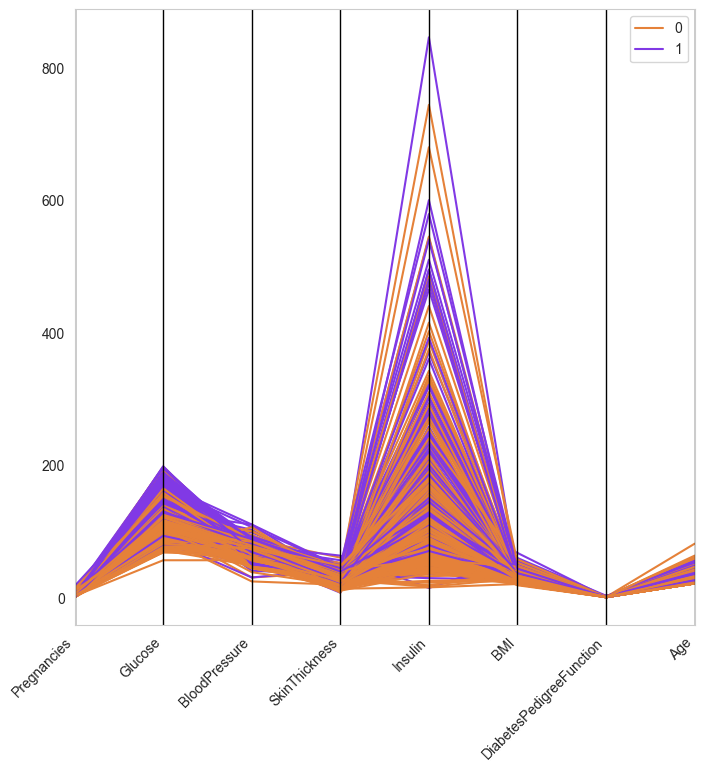

In [63]:
df_ini = X
df_ini["Outcome"] = y
plt.figure(figsize=(8, 8))
pd.plotting.parallel_coordinates(df_ini, "Outcome", color = ("#E58139",  "#8139E5", ))
plt.xticks(rotation=45, ha='right')

## Modelado, Arbol de Decision - Clasificación

In [64]:
#Modelo con 'entropy'

model_entropy = DecisionTreeClassifier(random_state = 50, criterion = 'entropy',  max_depth = 3)
model_entropy.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,50
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [65]:
y_pred_test = model_entropy.predict(X_test)
y_pred_test

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0])

In [66]:
y_pred_train = model_entropy.predict(X_train)
y_pred_train

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,

In [67]:
get_classifier_metrics(y_pred_test, y_test, y_pred_train, y_train)

,Accuracy,F1 Score,Precision,Recall
Train set,0.798722,0.798722,0.798722,0.798722
Test set,0.784810,0.784810,0.784810,0.784810


In [68]:
get_classifier_metrics(y_pred_test, y_test, y_pred_train, y_train, 'macro')

,Accuracy,F1 Score,Precision,Recall
Train set,0.798722,0.788125,0.783856,0.817846
Test set,0.784810,0.775606,0.772933,0.800926


In [69]:
#Métricas de Árbol de decisión. 

get_classifier_metrics(y_pred_test, y_test, y_pred_train, y_train, average='weighted')

,Accuracy,F1 Score,Precision,Recall
Train set,0.798722,0.804323,0.832057,0.798722
Test set,0.784810,0.789988,0.815352,0.784810


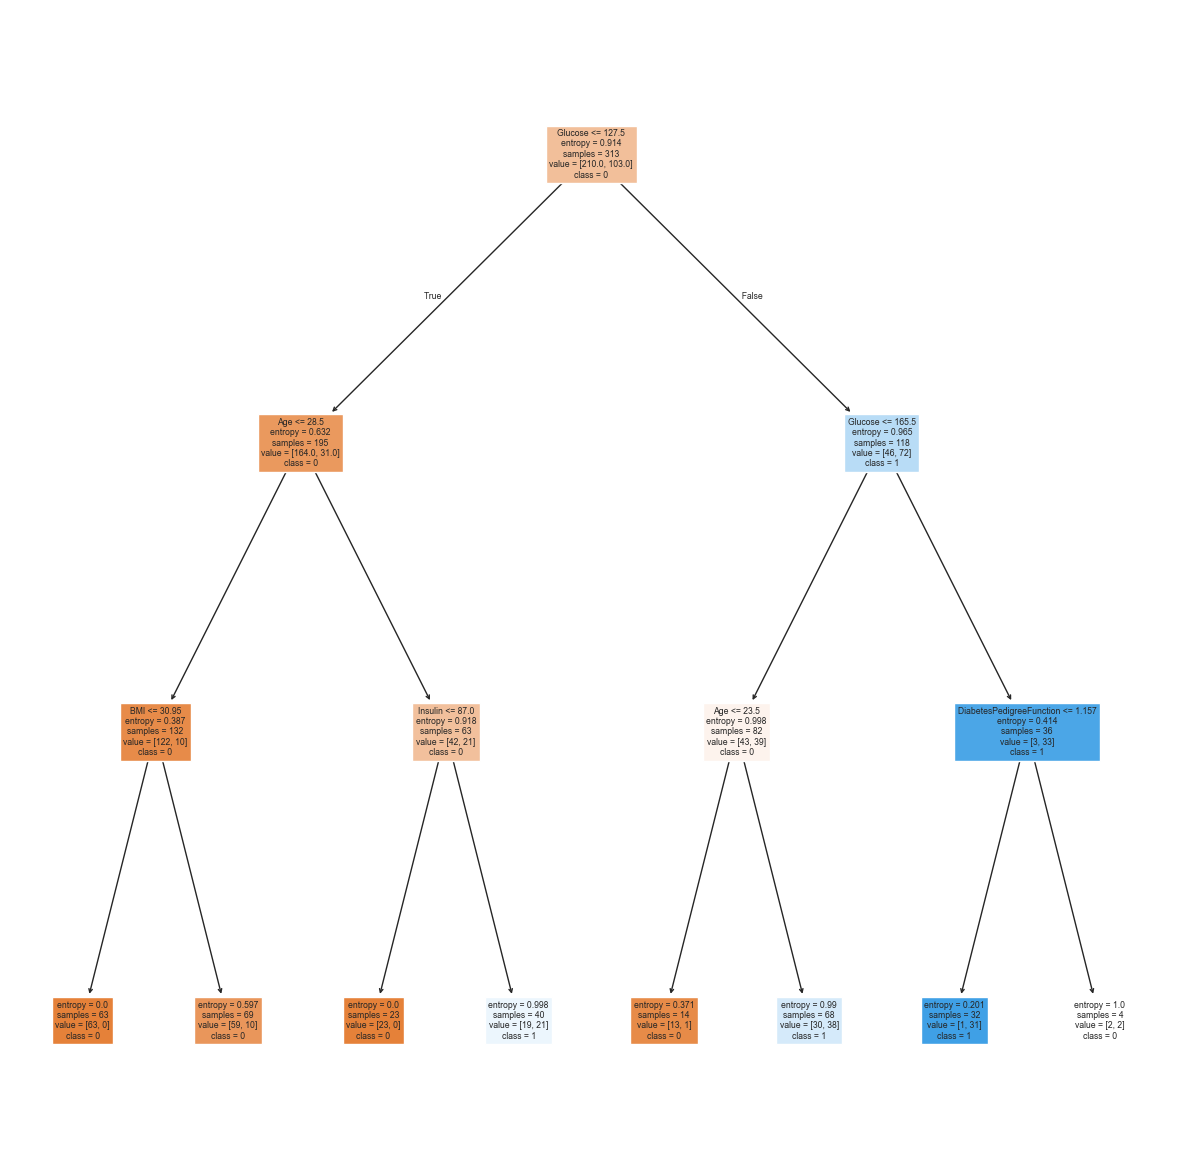

In [70]:
fig = plt.figure(figsize=(15,15))

tree.plot_tree(model_entropy, feature_names = list(X_train.columns), 
               class_names = ["0", "1", "2"], filled = True)

plt.show()

> ### Observación:
>
>He conseguido un modelo con un 78% de acierto sobre un 79 de train, por lo que está muy bien.
>
>Voy a Hiperparametrizarlo para ver si consigo mejores datos con entropy.

In [71]:
# Hiperparametrización de entropy.

# Definir hiperparámetros a probar
hparam = {'criterion': ['entropy'],
                   'splitter': ['best','random'],
                   'max_depth': [2, 3, 4, 5, 10],
                   'min_samples_split': [1, 2, 4]}

# Implementar GridSearchCV
grid_search_dtc = GridSearchCV(DecisionTreeClassifier(),
                                hparam,
                                cv=5,
                                n_jobs=-1,
                                verbose=1)

# Entrenamos
grid_search_dtc.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
grid_search_dtc.best_params_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_split': 4,
 'splitter': 'best'}

In [72]:
# Mejor modelo
grid_search_dtc.best_estimator_
# Entrenamos
grid_search_dtc.best_estimator_.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,4
,min_samples_split,4
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [73]:
y_pred_test_grid = grid_search_dtc.best_estimator_.predict(X_test)
y_pred_train_grid = grid_search_dtc.best_estimator_.predict(X_train)

In [74]:
#Métricas
get_classifier_metrics(y_pred_test_grid, y_test, y_pred_train_grid, y_train)

,Accuracy,F1 Score,Precision,Recall
Train set,0.840256,0.840256,0.840256,0.840256
Test set,0.746835,0.746835,0.746835,0.746835


>## Conclusión:
>
>No he conseguido mejorar el modelo con la hipeparametrización

In [75]:
#Modelo con 'gini'

model_gini = DecisionTreeClassifier(random_state = 50, criterion = 'gini',  max_depth = 3)
model_gini.fit(X_train, y_train)

y_pred_test_gini = model_gini.predict(X_test)
y_pred_train_gini = model_gini.predict(X_train)

get_classifier_metrics(y_pred_test_gini, y_test, y_pred_train_gini, y_train)

,Accuracy,F1 Score,Precision,Recall
Train set,0.808307,0.808307,0.808307,0.808307
Test set,0.721519,0.721519,0.721519,0.721519


In [76]:
# Hiperparametrización de gini.

# Definir hiperparámetros a probar
hparam = {'criterion': ['gini'],
                   'splitter': ['best','random'],
                   'max_depth': [2, 3, 4, 5, 10],
                   'min_samples_split': [1, 2, 4]}

# Implementar GridSearchCV
grid_search_dtc_gini= GridSearchCV(DecisionTreeClassifier(),
                                hparam,
                                cv=5,
                                n_jobs=-1,
                                verbose=1)

# Entrenamos
grid_search_dtc_gini.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
grid_search_dtc_gini.best_params_


# Mejor modelo
grid_search_dtc_gini.best_estimator_
# Entrenamos
grid_search_dtc_gini.best_estimator_.fit(X_train, y_train)

y_pred_test_grid_gini = grid_search_dtc_gini.best_estimator_.predict(X_test)
y_pred_train_grid_gini = grid_search_dtc_gini.best_estimator_.predict(X_train)


#Métricas
get_classifier_metrics(y_pred_test_grid_gini, y_test, y_pred_train_grid_gini, y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


,Accuracy,F1 Score,Precision,Recall
Train set,0.846645,0.846645,0.846645,0.846645
Test set,0.734177,0.734177,0.734177,0.734177


> ### Observación:
>
>Con gini una vez hiperparametrizado he conseguido un modelo con un 77% de acierto sobre un 79 de train, por lo que está muy bien. Perso sigue siendo mejor entropy.



In [77]:
#Modelo con 'log_loss'

model_ll = DecisionTreeClassifier(random_state = 50, criterion = 'log_loss',  max_depth = 3)
model_ll.fit(X_train, y_train)


y_pred_test_ll = model_ll.predict(X_test)
y_pred_train_ll = model_ll.predict(X_train)


get_classifier_metrics(y_pred_test_ll, y_test, y_pred_train_ll, y_train)


,Accuracy,F1 Score,Precision,Recall
Train set,0.798722,0.798722,0.798722,0.798722
Test set,0.784810,0.784810,0.784810,0.784810


In [78]:
# Hiperparametrización de log_loss.

# Definir hiperparámetros a probar
hparam = {'criterion': ['log_loss'],
                   'splitter': ['best','random'],
                   'max_depth': [2, 3, 4, 5, 10],
                   'min_samples_split': [1, 2, 4]}

# Implementar GridSearchCV
grid_search_dtc_ll = GridSearchCV(DecisionTreeClassifier(),
                                hparam,
                                cv=5,
                                n_jobs=-1,
                                verbose=1)

# Entrenamos
grid_search_dtc_ll.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
grid_search_dtc_ll.best_params_

# Mejor modelo
grid_search_dtc_ll.best_estimator_
# Entrenamos
grid_search_dtc_ll.best_estimator_.fit(X_train, y_train)

y_pred_test_grid_ll = grid_search_dtc_ll.best_estimator_.predict(X_test)
y_pred_train_grid_ll = grid_search_dtc_ll.best_estimator_.predict(X_train)


#Métricas
get_classifier_metrics(y_pred_test_grid_ll, y_test, y_pred_train_grid_ll, y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


,Accuracy,F1 Score,Precision,Recall
Train set,0.840256,0.840256,0.840256,0.840256
Test set,0.746835,0.746835,0.746835,0.746835


> ### Observación:
>
>Con log_loss nos da mejor resultado sin hiperparametrizar.
>
>Sin hiperparametrizar he conseguido un modelo con un 78.4% de acierto sobre un 79.8% de train, por lo que está muy bien. Siendo casi igual que con el critorio de 'entropy', hay una minima diferencia en los decimales de F1-Score.
>
>Vamos a observar los resultados con una tabla y un gráfico para una mejor visualización.

In [79]:
data = {'Modelo': ['entropy', 'gini', 'log_loss'],
        'Accuracy': [0.78481, 0.772152, 0.784810],
        'F1-Score': [0.789988, 0.772152, 0.784810]}

# Crear el DataFrame de resultados
df_resultados = pd.DataFrame(data)
df_resultados

,Modelo,Accuracy,F1-Score
0,entropy,0.784810,0.789988
1,gini,0.772152,0.772152
2,log_loss,0.784810,0.784810


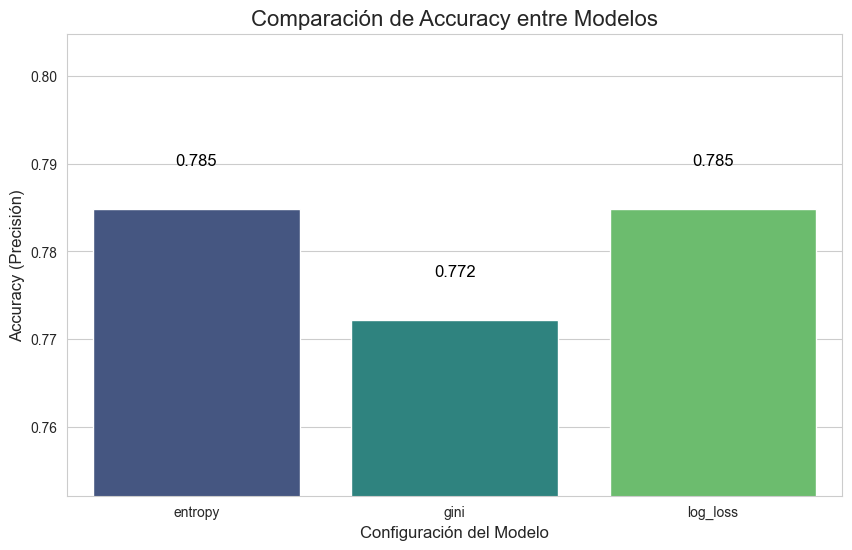

In [80]:
# Gráfico de barras

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# 2. Crear el gráfico de barras (comparando Accuracy)

sns.barplot(x='Modelo', y='Accuracy', data=df_resultados, palette='viridis')

# 3. Añadir el valor exacto de la métrica sobre cada barra (anotación)
for index, row in df_resultados.iterrows():
    plt.text(row.name, row.Accuracy + 0.005,  
             f'{row.Accuracy:.3f}', 
             color='black', ha="center", fontsize=12)

# 4. Configurar etiquetas y título
plt.title('Comparación de Accuracy entre Modelos', fontsize=16)
plt.xlabel('Configuración del Modelo', fontsize=12)
plt.ylabel('Accuracy (Precisión)', fontsize=12)
plt.ylim(df_resultados['Accuracy'].min() - 0.02, df_resultados['Accuracy'].max() + 0.02) # Ajustar el eje Y

plt.show()

In [84]:
#Guardo modelo con mejor resultado, que es con el criterio de log_loss.

with open('../models/04_decision_tree_classifier_insulina.pkl', 'wb') as file:
    pickle.dump(grid_search_dtc_ll, file)
